In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("D:\Data science\Datasets\student_performance_prediction.csv")

In [4]:
df.head()


,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [6]:
df.isna().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [7]:
df.shape


(40000, 7)

In [8]:
df.columns

Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')

In [9]:
 df.rename(columns={'Study Hours per Week': 'Study Hour',
                   'Attendance Rate':'Attendance Rate',
                   'Previous Grades':'Previous Grades',
                   'Participation in Extracurricular Activities':'ECA',
                   'Parent Education Level':'Parent Education Level',
                   'Passed':'Passed',
                   
                  }, inplace=True)

In [ ]:
#Cleaning dataset

In [10]:
df = df.drop(columns=['Student ID','Parent Education Level'])

In [11]:
df.head(5)

,Study Hour,Attendance Rate,Previous Grades,ECA,Passed
0,12.5,NaN,75.0,Yes,Yes
1,9.3,95.3,60.6,No,No
2,13.2,NaN,64.0,No,No
3,17.6,76.8,62.4,Yes,No
4,8.8,89.3,72.7,No,No


In [12]:
# Handle missing values for numerical columns
df['Study Hour'].fillna(df['Study Hour'].mean())
df['Attendance Rate'].fillna(df['Attendance Rate'].mean())
df['Previous Grades'].fillna(df['Previous Grades'].mean())

# Handle missing values for categorical columns
df['ECA'].fillna(df['ECA'].mode()[0])
 

# Drop any remaining missing values 
df.dropna(inplace=True)

In [13]:
df.head(5)

,Study Hour,Attendance Rate,Previous Grades,ECA,Passed
1,9.3,95.3,60.6,No,No
3,17.6,76.8,62.4,Yes,No
4,8.8,89.3,72.7,No,No
5,8.8,73.8,69.3,Yes,Yes
6,17.9,38.6,93.6,No,Yes


In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical variables
label_encoder = LabelEncoder()
df['ECA'] = label_encoder.fit_transform(df['ECA'])
df['Passed'] = label_encoder.fit_transform(df['Passed'])

df.head()

,Study Hour,Attendance Rate,Previous Grades,ECA,Passed
1,9.3,95.3,60.6,0,0
3,17.6,76.8,62.4,1,0
4,8.8,89.3,72.7,0,0
5,8.8,73.8,69.3,1,1
6,17.9,38.6,93.6,0,1


In [15]:
# Replace negative values with 0 in 'Attendance Rate' and 'Study Hour'
df['Attendance Rate'] = df['Attendance Rate'].apply(lambda x: 0 if x < 0 else x)
df['Study Hour'] = df['Study Hour'].apply(lambda x: 0 if x < 0 else x)
df['Previous Grades'] = df['Previous Grades'].apply(lambda x: 100 if x > 100 else x)


In [16]:
df.describe()

,Study Hour,Attendance Rate,Previous Grades,ECA,Passed
count,30986.000000,30986.000000,30986.000000,30986.000000,30986.000000
mean,10.013503,75.339741,65.102672,0.499451,0.499516
std,4.923558,20.431650,15.000276,0.500008,0.500008
min,0.000000,0.000000,8.300000,0.000000,0.000000
25%,6.600000,61.600000,55.000000,0.000000,0.000000
50%,10.000000,75.300000,65.200000,0.000000,0.000000
75%,13.400000,88.900000,75.200000,1.000000,1.000000
max,32.400000,150.200000,100.000000,1.000000,1.000000


In [ ]:
#EDA

<Axes: >

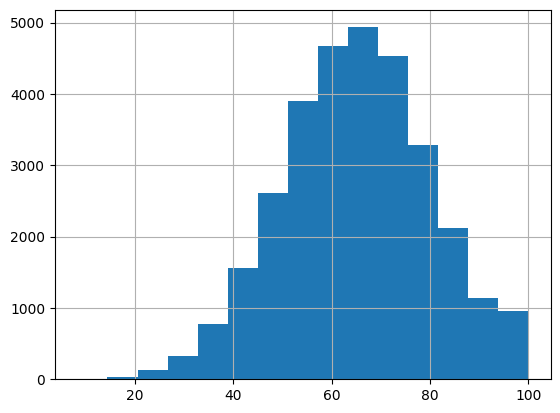

In [21]:
df['Previous Grades'].hist(bins=15)

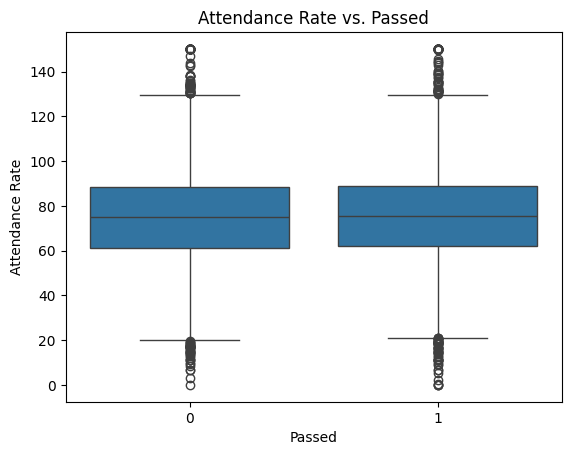

In [33]:
import seaborn as sns

sns.boxplot(x='Passed', y='Attendance Rate', data=df)
plt.title('Attendance Rate vs. Passed')
plt.show()

In [34]:
x=df.drop(columns='Passed')
x

,Study Hour,Attendance Rate,Previous Grades,ECA
1,9.3,95.3,60.6,0
3,17.6,76.8,62.4,1
4,8.8,89.3,72.7,0
5,8.8,73.8,69.3,1
6,17.9,38.6,93.6,0
...,...,...,...,...
39994,5.1,92.1,46.1,1
39995,15.6,93.8,51.4,1
39996,11.3,66.4,64.2,0
39997,13.1,65.6,38.1,0


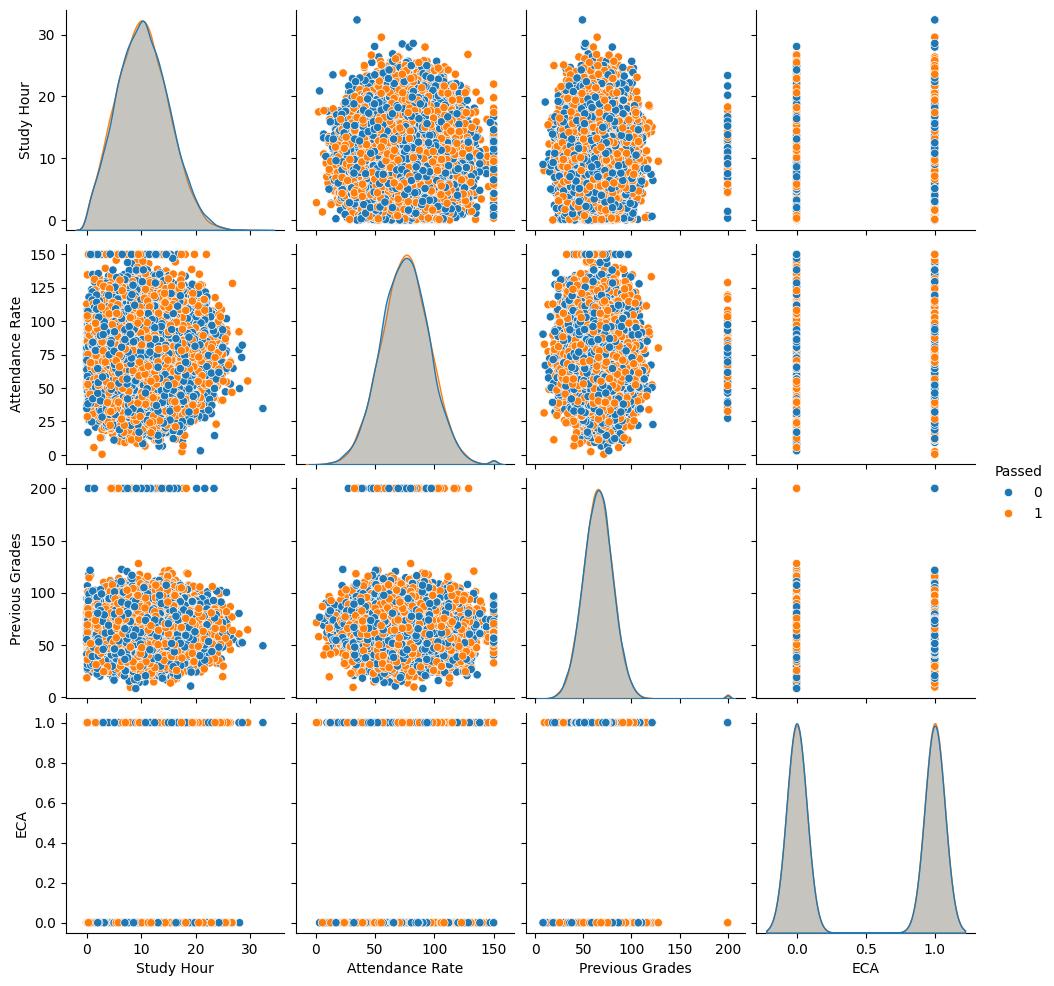

In [39]:
sns.pairplot(df, hue='Passed')
plt.show()

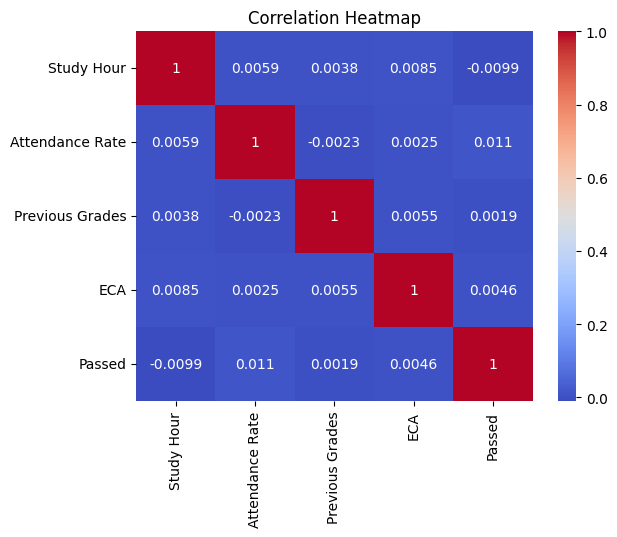

In [35]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

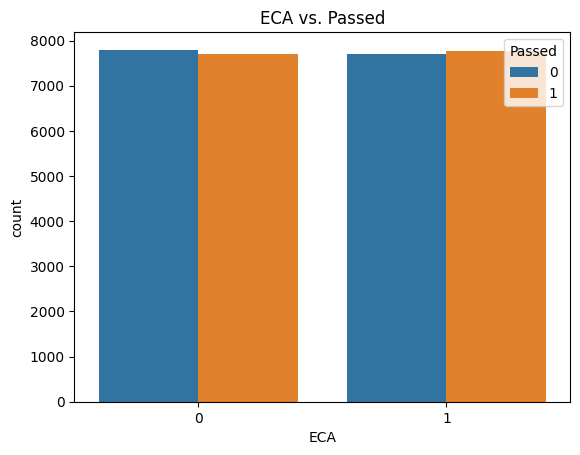

In [36]:
sns.countplot(x='ECA', hue='Passed', data=df)
plt.title('ECA vs. Passed')
plt.show()

In [37]:
y=df['Passed']
y

1        0
3        0
4        0
5        1
6        1
        ..
39994    0
39995    0
39996    1
39997    0
39999    1
Name: Passed, Length: 30986, dtype: int64

In [ ]:
#Machine Learning model

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=14)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)
 

In [48]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression(random_state=14,penalty='l2',C=1,fit_intercept=True)


In [49]:
lreg.fit(x_train_scaled,y_train)

LogisticRegression(C=1, random_state=14)

In [50]:
lreg.predict(x_train_scaled)

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [51]:
lreg.score(x_train_scaled,y_train)

0.506255802643795

In [52]:
 lreg.score(x_test_scaled,y_test)

0.5109358192900681

In [116]:
lreg.score(x_train_scaled,y_train)

0.5066195139644541

In [ ]:
#testing the modal using Random Forest Classsifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=17)

In [56]:
rf_classifier.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=10, random_state=17)

In [97]:
rf_classifier.score(x_train_scaled, y_train)

0.7282825535001813

In [57]:
rf_classifier.score(x_test_scaled, y_test)

0.4962352097525995

In [ ]:
#variatian on the accuracy due to overfitting of data in the training dataset